# Name : Omar Ashraf Youssef 
# ID : 43-11130

# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [39]:
mydata=pd.read_csv('/Classified Data')
mydata.head(10)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [6]:
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [7]:
scaler.fit(mydata.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(mydata.drop('TARGET CLASS',axis=1))

In [8]:
mydf_feat = pd.DataFrame(scaled_features,columns=mydata.columns[:-1])
mydf_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [11]:

X = mydf_feat
y = mydata['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,mydata['TARGET CLASS'],test_size=0.50, random_state=101)

In [13]:

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [16]:

pred = knn.predict(X_test)



### Evaluation of classification quality using Confusion Matrix

In [22]:
ConfMatrix = metrics.confusion_matrix(y_test,pred)
print(ConfMatrix)

[[242   8]
 [ 41 209]]


***Print Misclassification error rate***

In [24]:
MisErrorRate=np.mean( pred!= y_test)
print(MisErrorRate)

0.098


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [32]:
ErrorRate = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    ErrorRate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error Rate vs. K Value')

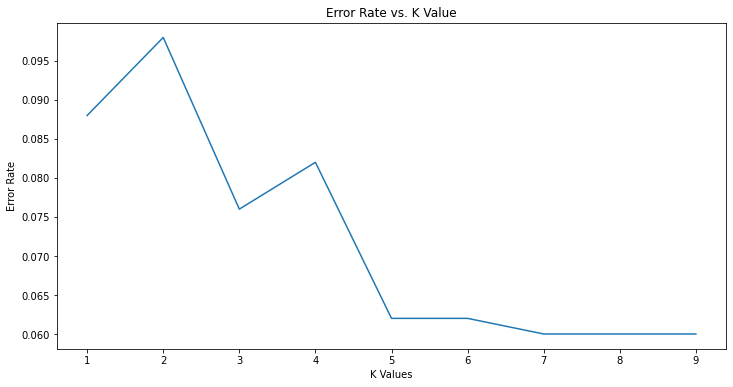

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), ErrorRate)

plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')